<a href="https://colab.research.google.com/github/wissemkarous/face-Emotion_Detection.ipynb/blob/main/face%26Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

Importing libraries


In [ ]:
!pip install -q face_recognition
!pip install -q fer

#Facial and Expression Recognition
import face_recognition
from fer import FER 

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline

#Python Imaging Library
import PIL.Image 

#To compute execution times
import time

Code-Snippet allowing Google Colab to take a Camera Capture

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

### Take a photo from webcam

In [ ]:
from IPython.display import Image

try:
  photo = take_photo()
  print('Saved to {}'.format(photo))
  
  # Show the image which was just taken.
  display(Image(photo))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

### Load and display image

In [ ]:
image = face_recognition.load_image_file(photo)
im = PIL.Image.open(photo)
fig=plt.subplots()
imshow(im)

### Face detection

In [ ]:
#starting time
start = time.time()

#retrieve all faces locations on picture
face_locations = face_recognition.face_locations(image, model="CNN")

fig,ax = plt.subplots()

#loop on number of faces in the picture
for face_location in face_locations:

    #retrieve face locations
    top, right, bottom, left = face_location 
    ax.imshow(im)

    #framing the face
    rect = patches.Rectangle((left,top), (right-left), (bottom-top), \
                              linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

#ending time
end = time.time()

print("Nb of faces:", len(face_locations))
print("Time taken:", round(end-start,2), "s")

### Emotion detection

In [ ]:
detector = FER(mtcnn=True) #using accurate MTCNN network

1/1 [==============================] - 0s 16ms/step


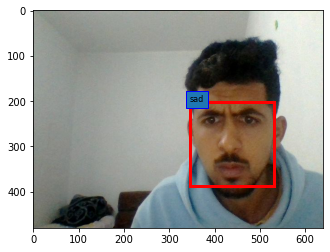

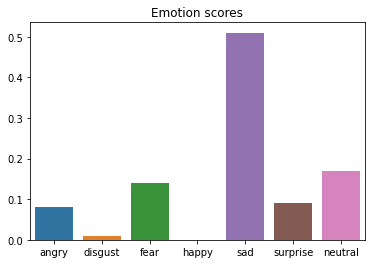

Top emotion: sad
Score: 0.51
Nb of faces: 1
Time taken: 1.41 s


In [ ]:
#starting time
start = time.time()

#retrieve face locations on picture
face_locations = face_recognition.face_locations(image, model="CNN")

fig, ax = plt.subplots()

#loop on number of faces
for face_location in face_locations:

    #retrieve face location
    top, right, bottom, left = face_location

    ax.imshow(im)

    #framing the face
    rect = patches.Rectangle((left,top), (right-left), (bottom-top), \
                             linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    face_image = image[top:bottom, left:right]

    #getting emotions using FER library
    emotions = detector.detect_emotions(face_image)
    emotion, score = detector.top_emotion(face_image)
    plt.text(left, top, emotion, fontsize=8, bbox=dict(fill=True, edgecolor='blue', linewidth=1))

#ending time
end = time.time()
plt.show()

#creating emotion scores barplot
plt.figure()
plt.title("Emotion scores")
keys = list(emotions[0]["emotions"].keys())
vals = list(emotions[0]["emotions"].values())
sns.barplot(x=keys, y=vals)
plt.show()


print("Top emotion:", emotion)
print("Score:", score)
print("Nb of faces:",len(face_locations))
print("Time taken:", round(end-start, 2) ,"s")